Os arquivos compactados no arquivo dados_CAPES_2018-04-06.zip trazem dados sobre os programas de pós-graduação em Informática de algumas instituições em 2017. Tratam-se de dados públicos, obtidos da plataforma Sucupira da CAPES (https://sucupira.capes.gov.br/sucupira/). 

O objetivo do trabalho T1.1 é fazer uma análise descritiva e responder algumas perguntas sobre os dados. Sempre que possível, as respostas devem ser dadas numérica e visualmente.

## Docentes
1) Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

## Discentes
2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

## Discentes x Docentes
3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?

4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

## Trabalhos de Conclusão
5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

## Discentes x Trabalhos de Conclusão
8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

## Produção
9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?

12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

## Produção x Qualis
13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}), qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

15) Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

# E1) Solução

In [1]:
# lendo arquivo docentes.csv local para um dataframe pandas
import pandas as pd

csv_file = "docentes.csv"
docentes_raw = pd.read_csv(csv_file)
docentes_data = docentes_raw
docentes_data.shape
docentes_data.rename(columns = {'categoria': 'CATEGORIA', 'ies': 'IES', 'nome': 'NOME', 'prof_id': 'ID DO PROFESSOR'}, inplace=True)

In [2]:
# examinando as 5 primeiras linhas do dataframe
docentes_data.head()

,CATEGORIA,IES,NOME,ID DO PROFESSOR
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALESSANDRO FABRICIO GARCIA,45076
2,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ANTONIO LUZ FURTADO,45077
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ARNDT VON STAA,45074
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093


{'COLABORADOR': 49, 'PERMANENTE': 440}

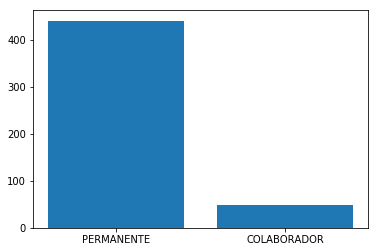

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# valores da coluna categoria
categoria_columns = docentes_data['CATEGORIA']
categorias = {}

# total de categorias
for column in categoria_columns:
    if column not in categorias:
        categorias[column] = 1
    else:
        categorias[column] +=1
# valor dos eixos        
x_labels = categorias.keys()
y_labels = categorias.values()

# gráfico de barras
x = range(len(x_labels))
plt.bar(x, y_labels)
plt.xticks(x, x_labels)
categorias

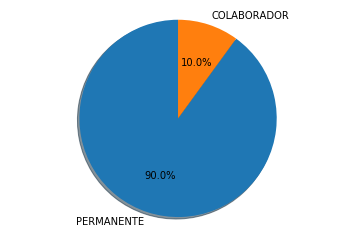

In [4]:
labels = x_labels
sizes = y_labels
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# E2) Solução

In [5]:
import math

csv_file = "discentes.csv"
discentes_raw = pd.read_csv(csv_file)
discentes_data = discentes_raw
discentes_data.shape
discentes_data.rename(columns = {'nível': 'nivel'}, inplace=True)
discentes_data.head(10)

,abrev,curso,data_matricula,deficiencia,discente_id,ies,nacionalidade,nivel,nome,orientador,orientadores,programa,raca,sexo,situacao
0,"LEON, A. C. (Principal)",INFORMÁTICA,03/08/2015,Não,889714,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ADRIAN CONCEPCION LEON,NaN,[],INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
1,"HERNANDEZ, A. G. (Principal)",INFORMÁTICA,02/03/2015,Não,838354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ADRIEL GARCIA HERNANDEZ,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
2,"FUENTES, A. D. (Principal)",INFORMÁTICA,15/04/2016,Não,948329,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAIN DOMINGUEZ FUENTES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
3,NaN,NaN,NaN,NaN,565354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"MENES, A. M. (Principal)",INFORMÁTICA,01/08/2014,Não,784513,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ALEJANDRO MUSTELIER MENES,ROBERTO IERUSALIMSCHY,"[{'nome': 'ROBERTO IERUSALIMSCHY', 'categoria'...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
5,"MERA, A. MERA CARABALLO, ALEXANDER ARTURO (Pri...",INFORMÁTICA,12/03/2013,Não,565342,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALEXANDER ARTURO MERA CARABALLO,MARCO ANTONIO CASANOVA,"[{'nome': 'MARCO ANTONIO CASANOVA', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
6,"CHAVEZ, ALEXANDER LOPEZ, A. LOPEZ, A. C. (Prin...",INFORMÁTICA,03/08/2015,Não,889277,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ALEXANDER CHAVEZ LOPEZ,ALESSANDRO FABRICIO GARCIA,"[{'nome': 'ALESSANDRO FABRICIO GARCIA', 'categ...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
7,"MESLIN, A. M. (Principal)",INFORMÁTICA,08/08/2016,Não,1032759,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALEXANDRE MALHEIROS MESLIN,NOEMI DE LA ROCQUE RODRIGUEZ,"[{'nome': 'NOEMI DE LA ROCQUE RODRIGUEZ', 'cat...",INFORMÁTICA(31005012004P9),-,Masculino,MATRICULADO
8,"COSTA, A. M. (Principal)",INFORMÁTICA,01/03/2017,Não,1122786,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ALEXANDRE MARANGONI COSTA,NaN,[],INFORMÁTICA(31005012004P9),-,Masculino,MATRICULADO
9,"ANDREZA, A. W. (Principal)",INFORMÁTICA,08/08/2016,Não,1032786,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ALEXANDRE WERNECK ANDREZA,NaN,[],INFORMÁTICA(31005012004P9),-,Masculino,MATRICULADO


In [33]:
programas_raw = discentes_data['programa']
programas = []
niveis = discentes_data['nivel']
mestrado = {}
doutorado ={}

# inicializando variáveis
for index, programa in enumerate(programas_raw):
    if programa not in programas:
        programas.append(programa)
    if not pd.isnull(programa):
        if niveis[index] == 'Mestrado':
            mestrado[programa] = 0
        if niveis[index] == 'Doutorado':
            doutorado[programa] = 0
            
# alunos em cada programa
for index, programa in enumerate(programas_raw):
    if not pd.isnull(programa):
        if niveis[index] == 'Mestrado':
            mestrado[programa] +=1
        if niveis[index] == 'Doutorado':
            doutorado[programa] +=1
            

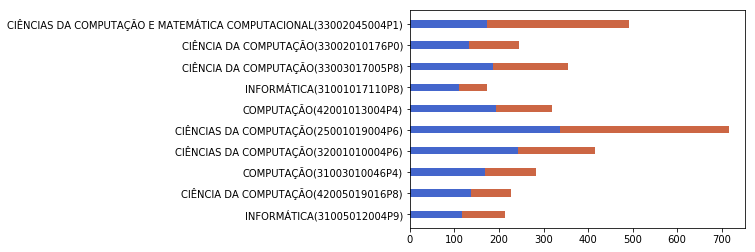

In [34]:
import numpy as np

y = []
y2 = []
x_labels = []
for programa in programas:
    if not pd.isnull(programa):
        x_labels.append(programa)
        y.append(mestrado[programa])
        y2.append(doutorado[programa])

x = range(len(x_labels))
bar_width = 0.35
        
plt.figure()
plt.barh(x, y, height = bar_width, color='#4466cc')
plt.barh(x, y2, height = bar_width, left=y, color='#cc6644')

_ = plt.yticks(x, x_labels)


# E3) Solução

In [35]:
docentes_discentes = docentes_data.merge(discentes_data, left_on='NOME', right_on='orientador')
categorias = docentes_discentes['CATEGORIA']

for index, item in enumerate(categorias):
    if item=='PERMANENTE':
        if docentes_discentes['nivel'][index]=='Mestrado':
            mestrado[docentes_discentes['orientador'][index]] = 0
        if docentes_discentes['nivel'][index]=='Doutorado':
            doutorado[docentes_discentes['orientador'][index]] = 0

professores = []
for index, item in enumerate(categorias):
    if item=='PERMANENTE':
        if docentes_discentes['orientador'][index] not in professores:
            professores.append(docentes_discentes['orientador'][index])
        if docentes_discentes['nivel'][index]=='Mestrado':
            mestrado[docentes_discentes['orientador'][index]] += 1
        if docentes_discentes['nivel'][index]=='Doutorado':
            doutorado[docentes_discentes['orientador'][index]] += 1

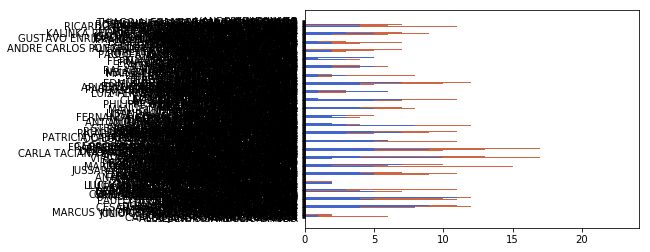

In [37]:
y = []
y2 = []
x_labels = []
for professor in professores:
    if not pd.isnull(professor):
        x_labels.append(professor)
        if professor in mestrado.keys() and not pd.isnull(mestrado[professor]):
            y.append(mestrado[professor])
        else: 
            y.append(0)
        if professor in doutorado.keys() and not pd.isnull(doutorado[professor]):
            y2.append(doutorado[professor])
        else:
            y2.append(0)

x = range(len(x_labels))
bar_width = 0.35
        
plt.figure()
plt.barh(x, y, height = bar_width, color='#4466cc')
plt.barh(x, y2, height =bar_width, left=y, color='#cc6644')

_ = plt.yticks(x, x_labels)

# print(x_labels)